In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import shap


/Users/wiley/miniconda3/envs/tf_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

# Load the dataset
file_path = "healthcare_dataset.csv"
df = pd.read_csv(file_path)


In [3]:

# Step 1: Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


In [4]:

# Step 2: Descriptive statistics for numerical variables
numerical_summary = df.describe()
print("Numerical Summary:\n", numerical_summary)


Numerical Summary:
                 Age  Billing Amount   Room Number
count  55500.000000    55500.000000  55500.000000
mean      51.539459    25539.316097    301.134829
std       19.602454    14211.454431    115.243069
min       13.000000    -2008.492140    101.000000
25%       35.000000    13241.224652    202.000000
50%       52.000000    25538.069376    302.000000
75%       68.000000    37820.508436    401.000000
max       89.000000    52764.276736    500.000000


In [5]:

# Step 3: Convert date columns to datetime format
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'], errors='coerce')
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'], errors='coerce')


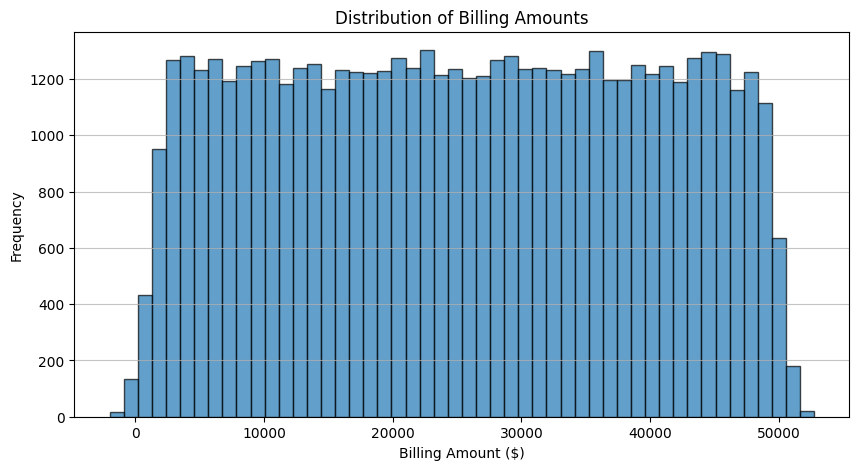

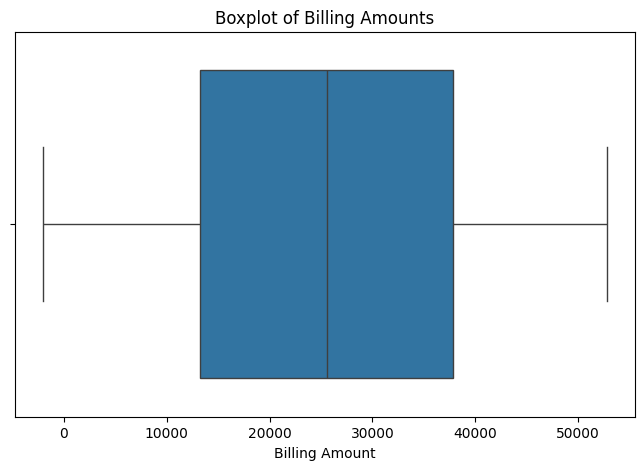

In [6]:

# Step 4: Distribution of Billing Amounts
plt.figure(figsize=(10, 5))
plt.hist(df['Billing Amount'], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Billing Amount ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Billing Amounts')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Boxplot of Billing Amounts
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Billing Amount'])
plt.title("Boxplot of Billing Amounts")
plt.show()


In [7]:

# Step 5: Investigate Negative Billing Amounts
negative_billing = df[df['Billing Amount'] < 0]
print("Negative Billing Amounts:\n", negative_billing)


Negative Billing Amounts:
                     Name  Age  Gender Blood Type Medical Condition  \
132      ashLEy ERIcKSoN   32  Female        AB-            Cancer   
799    CHRisTOPHer wEiss   49  Female        AB-            Asthma   
1018       AsHley WaRnER   60    Male         A+      Hypertension   
1421        JAY galloWaY   74  Female         O+            Asthma   
2103   josHUa wilLIamSon   72  Female         B-          Diabetes   
...                  ...  ...     ...        ...               ...   
52894         JosEPh cOx   23    Male        AB-          Diabetes   
53204      AsHley WaRnER   55    Male         A+      Hypertension   
53232       dAnIel dRaKe   68  Female         B+      Hypertension   
54136  DR. micHaEl MckAy   64    Male         O+            Cancer   
55276       JOhN fERRELl   58  Female         O-      Hypertension   

      Date of Admission          Doctor                   Hospital  \
132          2019-11-05   Gerald Hooper  and Johnson Moore, Br


Gender Distribution:
 Gender
Male      27774
Female    27726
Name: count, dtype: int64


/var/folders/zm/k7mfmhq51gv7d8g3r5dwtjj00000gn/T/ipykernel_55155/3372961511.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette="viridis")


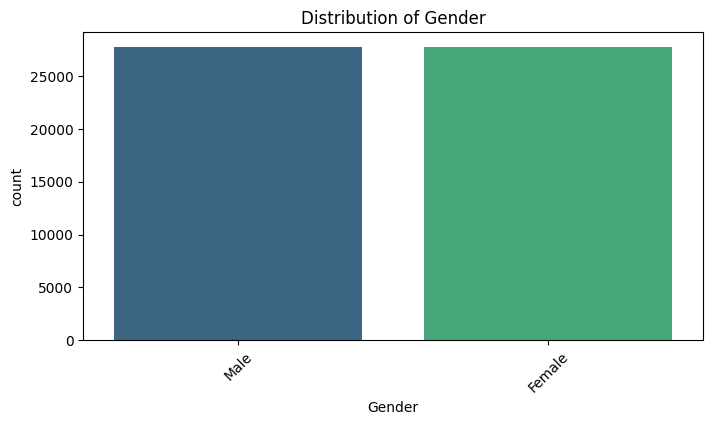


Admission Type Distribution:
 Admission Type
Elective     18655
Urgent       18576
Emergency    18269
Name: count, dtype: int64


/var/folders/zm/k7mfmhq51gv7d8g3r5dwtjj00000gn/T/ipykernel_55155/3372961511.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette="viridis")


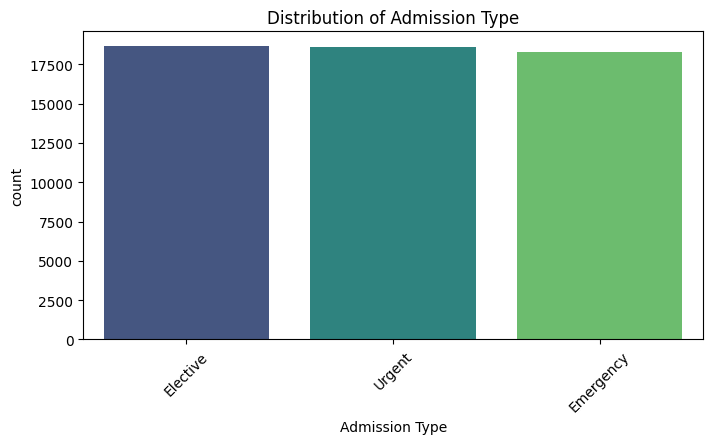


Insurance Provider Distribution:
 Insurance Provider
Cigna               11249
Medicare            11154
UnitedHealthcare    11125
Blue Cross          11059
Aetna               10913
Name: count, dtype: int64


/var/folders/zm/k7mfmhq51gv7d8g3r5dwtjj00000gn/T/ipykernel_55155/3372961511.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette="viridis")


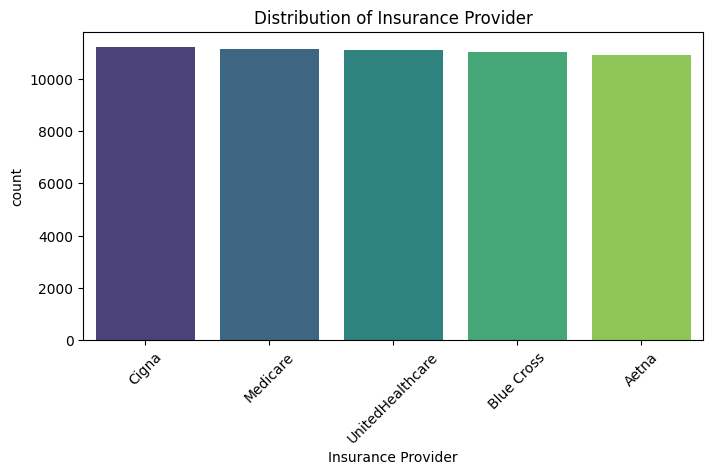


Medical Condition Distribution:
 Medical Condition
Arthritis       9308
Diabetes        9304
Hypertension    9245
Obesity         9231
Cancer          9227
Asthma          9185
Name: count, dtype: int64


/var/folders/zm/k7mfmhq51gv7d8g3r5dwtjj00000gn/T/ipykernel_55155/3372961511.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette="viridis")


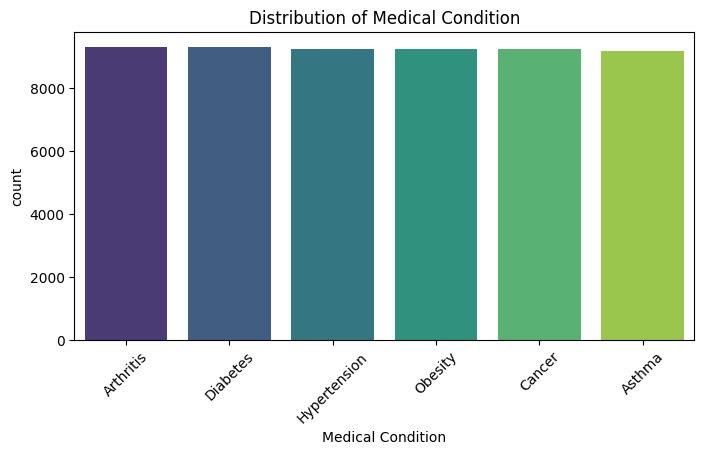

In [8]:

# Step 6: Count distributions for categorical variables
categorical_columns = ['Gender', 'Admission Type', 'Insurance Provider', 'Medical Condition']
for col in categorical_columns:
    print(f"\n{col} Distribution:\n", df[col].value_counts())
    
    # Bar plot for categorical distributions
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df[col], order=df[col].value_counts().index, palette="viridis")
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()


In [9]:

# Step 7: Calculate hospital stay duration
df['Hospital Stay (Days)'] = (df['Discharge Date'] - df['Date of Admission']).dt.days


In [10]:

# Step 8: Summary of hospital stay durations
hospital_stay_summary = df['Hospital Stay (Days)'].describe()
print("\nHospital Stay Summary:\n", hospital_stay_summary)



Hospital Stay Summary:
 count    55500.000000
mean        15.509009
std          8.659600
min          1.000000
25%          8.000000
50%         15.000000
75%         23.000000
max         30.000000
Name: Hospital Stay (Days), dtype: float64


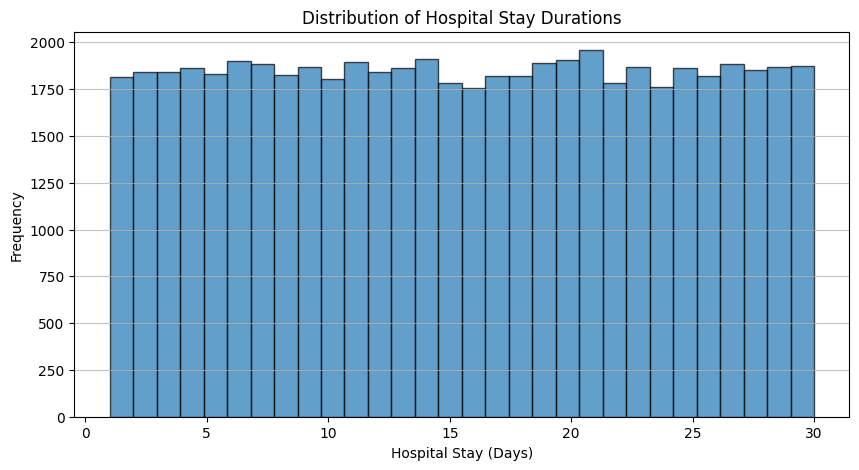

In [11]:

# Histogram of Hospital Stay Durations
plt.figure(figsize=(10, 5))
plt.hist(df['Hospital Stay (Days)'].dropna(), bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Hospital Stay (Days)')
plt.ylabel('Frequency')
plt.title('Distribution of Hospital Stay Durations')
plt.grid(axis='y', alpha=0.75)
plt.show()


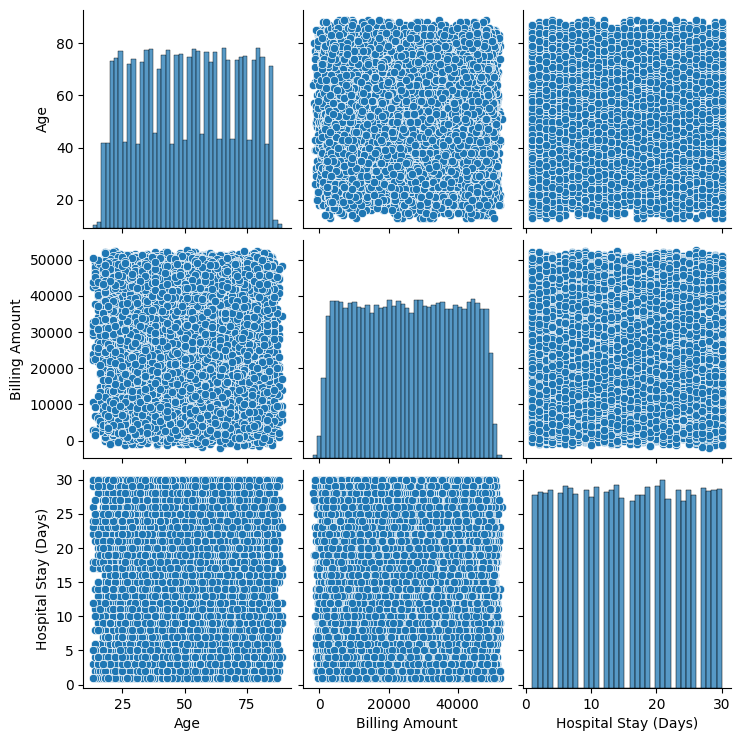

In [12]:
# Pairplot for numerical variables
sns.pairplot(df[['Age', 'Billing Amount', 'Hospital Stay (Days)']])
plt.show()


Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.44      0.44      3754
           1       0.43      0.44      0.43      3617
           2       0.45      0.44      0.45      3729

    accuracy                           0.44     11100
   macro avg       0.44      0.44      0.44     11100
weighted avg       0.44      0.44      0.44     11100

Confusion Matrix:
 [[1666 1064 1024]
 [1042 1576  999]
 [1059 1018 1652]]
Accuracy Score:
 0.4409009009009009


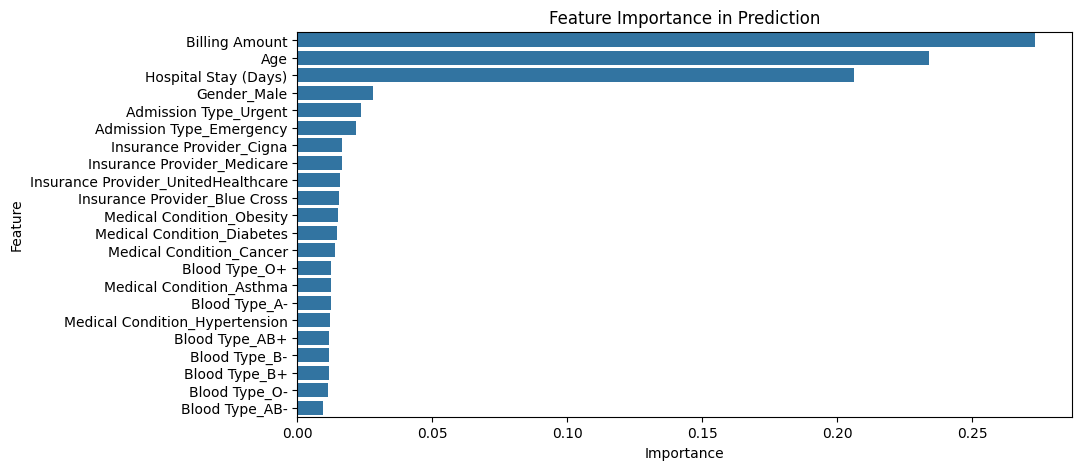

<Figure size 640x480 with 0 Axes>

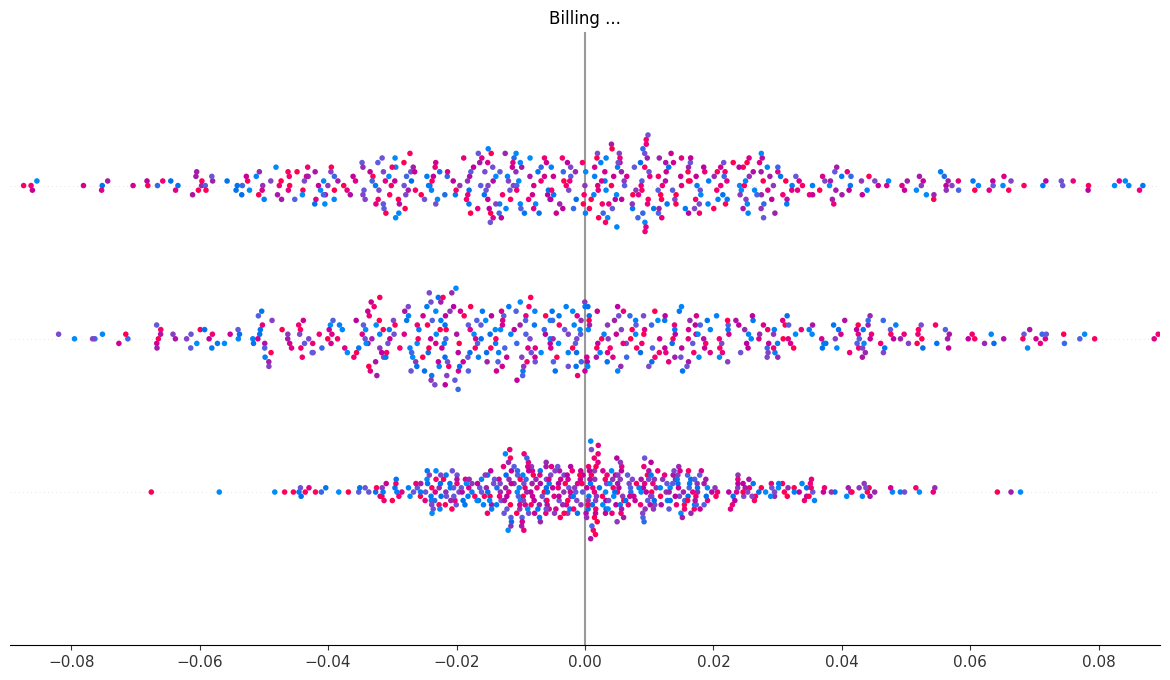

In [17]:
# Encode categorical features
le = LabelEncoder()
df['Test Results'] = le.fit_transform(df['Test Results'])  # Encoding target variable

# Drop only existing columns to avoid KeyError
columns_to_drop = ['Name', 'Doctor', 'Hospital', 'Date of Admission', 'Discharge Date', 'Medication', 'Room Number']
df = df.drop(columns=df.columns.intersection(columns_to_drop), errors='ignore')

# Identify categorical columns that are still present in the dataframe
categorical_columns = ['Gender', 'Admission Type', 'Insurance Provider', 'Medical Condition', 'Blood Type']
existing_categorical_columns = df.columns.intersection(categorical_columns).tolist()

# Apply one-hot encoding only to existing categorical columns
if existing_categorical_columns:
    df = pd.get_dummies(df, columns=existing_categorical_columns, drop_first=True)

# Define features and target
X = df.drop(columns=['Test Results'])  # Ensure all categorical variables are encoded
y = df['Test Results']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:\n", accuracy_score(y_test, y_pred))

# Feature Importance Analysis
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': clf.feature_importances_}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances['Importance'], y=feature_importances['Feature'])
plt.title("Feature Importance in Prediction")
plt.show()

# Optimized SHAP Explanation (Using TreeExplainer and Limiting Data to Avoid Crashes)
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test.sample(500, random_state=42))  # Reduce data size
shap.summary_plot(shap_values, X_test.sample(500, random_state=42))